In [256]:
%matplotlib inline

In [257]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import modules
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt

#import warning
from warnings import filterwarnings
filterwarnings('ignore')

In [258]:
titanic_url = ('https://raw.githubusercontent.com/amueller/scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
data = pd.read_csv(titanic_url)

In [259]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [261]:
data.shape

(1309, 14)

In [262]:
pd.unique(data[['pclass', 'sex', 'embarked', 'survived']].values.ravel('K'))

array([1, 2, 3, 'female', 'male', 'S', 'C', nan, 'Q', 0], dtype=object)

In [263]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Text(0.5, 1, 'titanic_correlation')

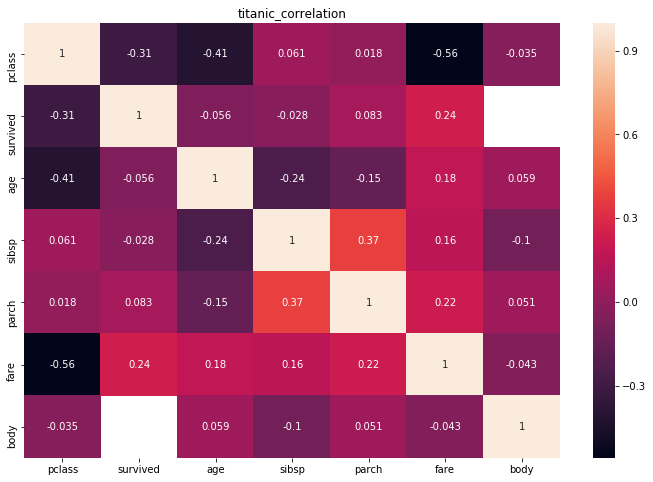

In [264]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 8))
corr = data.corr().round(3)
sns.heatmap(corr, annot=True).set_title('titanic_correlation')

In [265]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Prepare the data for Machine Learning Algorithms
    . Data cleaning
    . Handling categorical and numeric features
    . Transformers
    . Feature scaling
    . Transformation pipelines

In [266]:
data = data.drop(['name', 'cabin', 'ticket', 'boat', 'home.dest', 'sibsp', 'sex'], axis=1)

In [267]:
data1 = data.copy()

# separating the feature vecotrs and the target values
X = data1.drop('survived', axis =1)
y = data1['survived']

X.columns

Index(['pclass', 'age', 'parch', 'fare', 'embarked', 'body'], dtype='object')

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), "train +", len(y_test), "test")

1047 train + 262 test


In [269]:
# Create pipeline for both numeric and categorical features
numeric_features = ['age', 'fare', 'body']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

titanic_prepared = preprocessor.fit_transform(data)

# Append classifier to preprocessing pipeline
# Now we have a full prediction pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier())])
                      #('classifier', LogisticRegression())])

In [270]:
titanic_prepared.shape

(1309, 10)

In [271]:
logreg_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logreg_clf.fit(titanic_prepared, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [272]:
from sklearn.metrics import classification_report, confusion_matrix

logreg_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logreg_clf.fit(titanic_prepared, y)
titanic_predictions = logreg_clf.predict(titanic_prepared)


print("Confusion Matrix:")
print(confusion_matrix(y, titanic_predictions))

print("Classification Report")
print(classification_report(y, titanic_predictions))

Confusion Matrix:
[[703 106]
 [278 222]]
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       809
           1       0.68      0.44      0.54       500

    accuracy                           0.71      1309
   macro avg       0.70      0.66      0.66      1309
weighted avg       0.70      0.71      0.69      1309



In [273]:
logreg_clf.score(titanic_prepared, y)

0.706646294881589

In [274]:
active_imports()

import sklearn


['import sklearn']

In [275]:
#pip install xgboost

In [276]:
import xgboost as xgb

In [277]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier

In [278]:
classifiers = [
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    SVR(gamma='scale', C=1.0, epsilon=0.2),
    DecisionTreeClassifier(),
    KNeighborsClassifier(3),
    xgb.XGBClassifier(objective= 'reg:squarederror', alpha=10, n_estimators=100),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(solver='liblinear')
    ]

In [279]:
for classifier in classifiers:
    clf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    clf_pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % clf_pipe.score(X_test, y_test))

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
model score: 0.550
NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.5, probability=True, random_state=None,
      shrinking=True, tol=0.001, verbose=False)
model score: 0.702
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
model score: 0.139
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       

In [280]:
clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__imputer', 'preprocessor__cat__onehot', 'preprocessor__cat__imputer__add_indicator', 'preprocess

In [281]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [282]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

#params = {'n_estimators':np.arange(20,81,10),
          #'criterion': ['friedman_mse'],
          #'max_depth': [4]}
params = { 'n_estimators': np.arange(3, 80, 10), 'max_depth': [3], 'learning_rate': [0.1]}                        

gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

grid_search = GridSearchCV(gb_clf, param_grid=params, scoring='neg_mean_squared_error', n_jobs=4, iid=False, cv=5)

grid_search.fit(titanic_prepared, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [283]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 3}

In [284]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [285]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6192726229198696 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 3}
0.6422801285759282 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 13}
0.6499595585001026 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 23}
0.6552233639708537 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 33}
0.6540572904081338 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 43}
0.6575493075106883 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 53}
0.6546361190937293 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 63}
0.6511060192376976 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 73}


In [286]:
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_

X_test = data1.drop('survived', axis=1)
y_test = data1['survived'].copy()

X_test_prepared = preprocessor.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
print(final_mse)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

0.3819709702062643
0.6180380006166808


In [287]:
active_imports()

import sklearn


['import sklearn']